<a href="https://colab.research.google.com/github/jumacaq/credit_score/blob/master/CreditScoringPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BUSINESS PROBLEM**


---




The importance of reducing credit risk has led a German financial institution to seek innovative solutions. As data scientists, we have been called upon to build an accurate and reliable machine learning model that is able to more accurately assess the probability of credit default for its customers.

### **Your main tasks will be:**

**1. Data Preprocessing:** Perform data cleaning, handle missing values, encode categorical variables, and normalize/scaled data.

**2. Data Exploration:** Analyze and understand the provided dataset, identify key variables, and perform visualizations to understand the relationships between variables and select relevant features.

**3. Model Building:** Experiment with some machine learning algorithms such as Logistic Regression, Decision Trees, Random Forest, Naive Bayes, among others.

**4. Model Evaluation and Selection:** Evaluate the models using metrics such as precision, recall, area under the ROC curve, and F1-score. Select the model with the best performance for creditworthiness prediction.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report

#**1. Preprocessing Data**


---


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data = pd.read_csv("/content/drive/MyDrive/ bootcamp experience/Data Science/febrero 2025/CreditRisk.csv")
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4455 non-null   object
 1   seniority  4455 non-null   int64 
 2   home       4455 non-null   object
 3   time       4455 non-null   int64 
 4   age        4455 non-null   int64 
 5   marital    4455 non-null   object
 6   records    4455 non-null   object
 7   job        4455 non-null   object
 8   expenses   4455 non-null   int64 
 9   income     4455 non-null   int64 
 10  assets     4455 non-null   int64 
 11  debt       4455 non-null   int64 
 12  amount     4455 non-null   int64 
 13  price      4455 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 487.4+ KB


In [10]:
#Displaying all columns of dataset
pd.set_option('display.max_columns', None)
#Setting float format with two decimals
pd.set_option('display.float_format','{:.2f}'.format)
data.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00
mean,7.99,46.44,37.08,55.57,763316.99,1060340.81,404381.96,1039.02,1462.88
std,8.17,14.66,10.98,19.52,8703625.26,10217568.67,6344253.40,474.54,628.09
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50
50%,5.00,48.00,36.00,51.00,120.00,3500.00,0.00,1000.00,1400.00
75%,12.00,60.00,45.00,72.00,166.00,6000.00,0.00,1300.00,1692.00
max,48.00,72.00,68.00,180.00,99999999.00,99999999.00,99999999.00,5000.00,11140.00


In [11]:
#status column could be a target variable
data.status.value_counts()

,count
status,
ok,3200
default,1254
unk,1


In [12]:
#There is one single row with status 'unk' or 'unknown', I will consider it as 'ok'
data[data['status']=='unk']

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3309,unk,10,private,60,25,single,no,fixed,35,148,3000,0,1500,1888


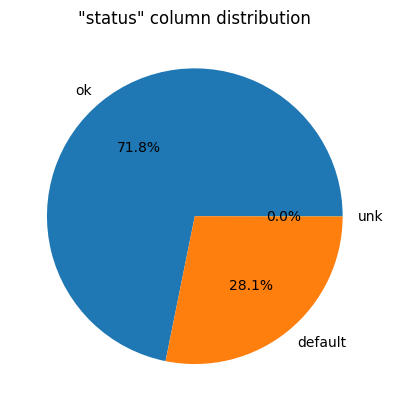

In [13]:
plt.pie(data['status'].value_counts(), labels=data['status'].value_counts().index, autopct='%1.1f%%')
plt.title('"status" column distribution')
plt.show()

## 1.1 Default column format

In [14]:
#Setting target variable as 'default' columnn based on 'status' column
data['default'] = np.where(data['status']=='default',1,0)
data.default.value_counts()

,count
default,
0,3201
1,1254


## 1.2 Anomalous data

In [15]:
t_desc_num = data.describe()
t_desc_num.round(1)

,seniority,time,age,expenses,income,assets,debt,amount,price,default
count,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00
mean,8.00,46.40,37.10,55.60,763317.00,1060340.80,404382.00,1039.00,1462.90,0.30
std,8.20,14.70,11.00,19.50,8703625.30,10217568.70,6344253.40,474.50,628.10,0.40
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00,0.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50,0.00
50%,5.00,48.00,36.00,51.00,120.00,3500.00,0.00,1000.00,1400.00,0.00
75%,12.00,60.00,45.00,72.00,166.00,6000.00,0.00,1300.00,1692.00,1.00
max,48.00,72.00,68.00,180.00,99999999.00,99999999.00,99999999.00,5000.00,11140.00,1.00


### Imputing anomalous data like 99999999 with null values

In [16]:
cols_to_fix = ['income', 'debt', 'assets']  # Specify only affected columns
data[cols_to_fix] = data[cols_to_fix].replace(99999999, np.nan)


## 1.3 Imputing Data

In [17]:
data.isnull().sum()

,0
status,0
seniority,0
home,0
time,0
age,0
marital,0
records,0
job,0
expenses,0
income,34


### Imputing null values with median() of each column

In [18]:
data.fillna({col: data[col].median() for col in cols_to_fix}, inplace=True)


In [19]:
data.isnull().sum()

,0
status,0
seniority,0
home,0
time,0
age,0
marital,0
records,0
job,0
expenses,0
income,0


In [20]:
#figure out how many rows in column 'income' have value 0
data[data['income']== 0]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
113,default,0,owner,36,39,single,no,freelance,35,0.00,4000.00,0.00,1000,1210,1
143,ok,40,owner,36,58,married,no,freelance,75,0.00,50000.00,0.00,1000,1160,0
152,ok,27,owner,60,59,married,no,freelance,45,0.00,11000.00,0.00,1100,1300,0
157,ok,3,owner,48,25,single,no,freelance,35,0.00,4000.00,0.00,1200,1449,0
176,default,0,rent,60,48,separated,yes,freelance,35,0.00,25300.00,15500.00,1200,1257,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,ok,40,owner,36,58,married,no,freelance,45,0.00,26000.00,0.00,1500,2554,0
4420,ok,2,owner,60,27,single,no,others,35,0.00,40000.00,23500.00,2000,2038,0
4436,default,3,rent,48,26,married,yes,freelance,45,0.00,0.00,0.00,1400,1704,1
4440,ok,20,owner,60,38,married,no,freelance,60,0.00,15000.00,0.00,1000,1638,0


  There are 341 rows with value 0
  

In [21]:
zero_income = data[data['income'].isna() | (data['income'] == 0)]


In [22]:
zero_income.status.value_counts()

,count
status,
default,197
ok,150


In [23]:
zero_income

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
113,default,0,owner,36,39,single,no,freelance,35,0.00,4000.00,0.00,1000,1210,1
143,ok,40,owner,36,58,married,no,freelance,75,0.00,50000.00,0.00,1000,1160,0
152,ok,27,owner,60,59,married,no,freelance,45,0.00,11000.00,0.00,1100,1300,0
157,ok,3,owner,48,25,single,no,freelance,35,0.00,4000.00,0.00,1200,1449,0
176,default,0,rent,60,48,separated,yes,freelance,35,0.00,25300.00,15500.00,1200,1257,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,ok,40,owner,36,58,married,no,freelance,45,0.00,26000.00,0.00,1500,2554,0
4420,ok,2,owner,60,27,single,no,others,35,0.00,40000.00,23500.00,2000,2038,0
4436,default,3,rent,48,26,married,yes,freelance,45,0.00,0.00,0.00,1400,1704,1
4440,ok,20,owner,60,38,married,no,freelance,60,0.00,15000.00,0.00,1000,1638,0


In [24]:
zero_income.records.value_counts()

,count
records,
no,252
yes,95


In [25]:
zero_income.job.value_counts()

,count
job,
freelance,279
fixed,31
partime,18
others,18
unk,1


In [26]:
zero_income.home.value_counts()

,count
home,
owner,144
rent,80
other,55
parents,53
private,14
ignore,1


##1.4 Numerical columns description

###Numerical data distribution

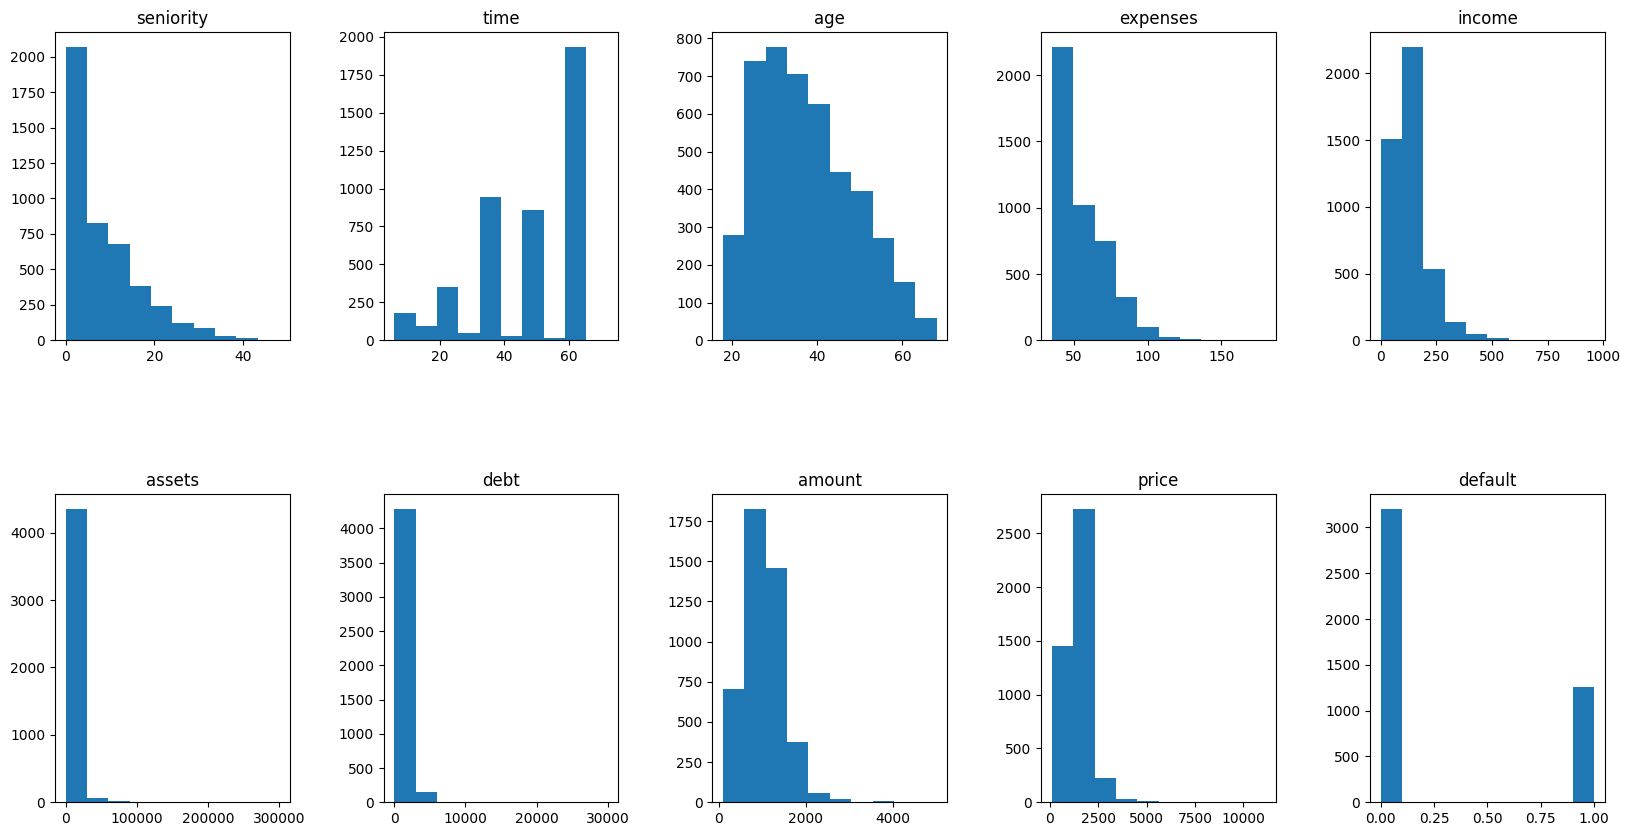

In [27]:
numerics = t_desc_num.columns
fig, ax = plt.subplots(2,5,figsize=(20,10))
i = 0
for row in range(2):
  for col in range(5):
    ax.ravel()[i].hist(data[numerics[i]],bins=10)
    ax.ravel()[i].set_title(numerics[i])
    i += 1

# Adjust spacing
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Increase space between plots

plt.show()

### Numerical data boxplots to visualize outliers

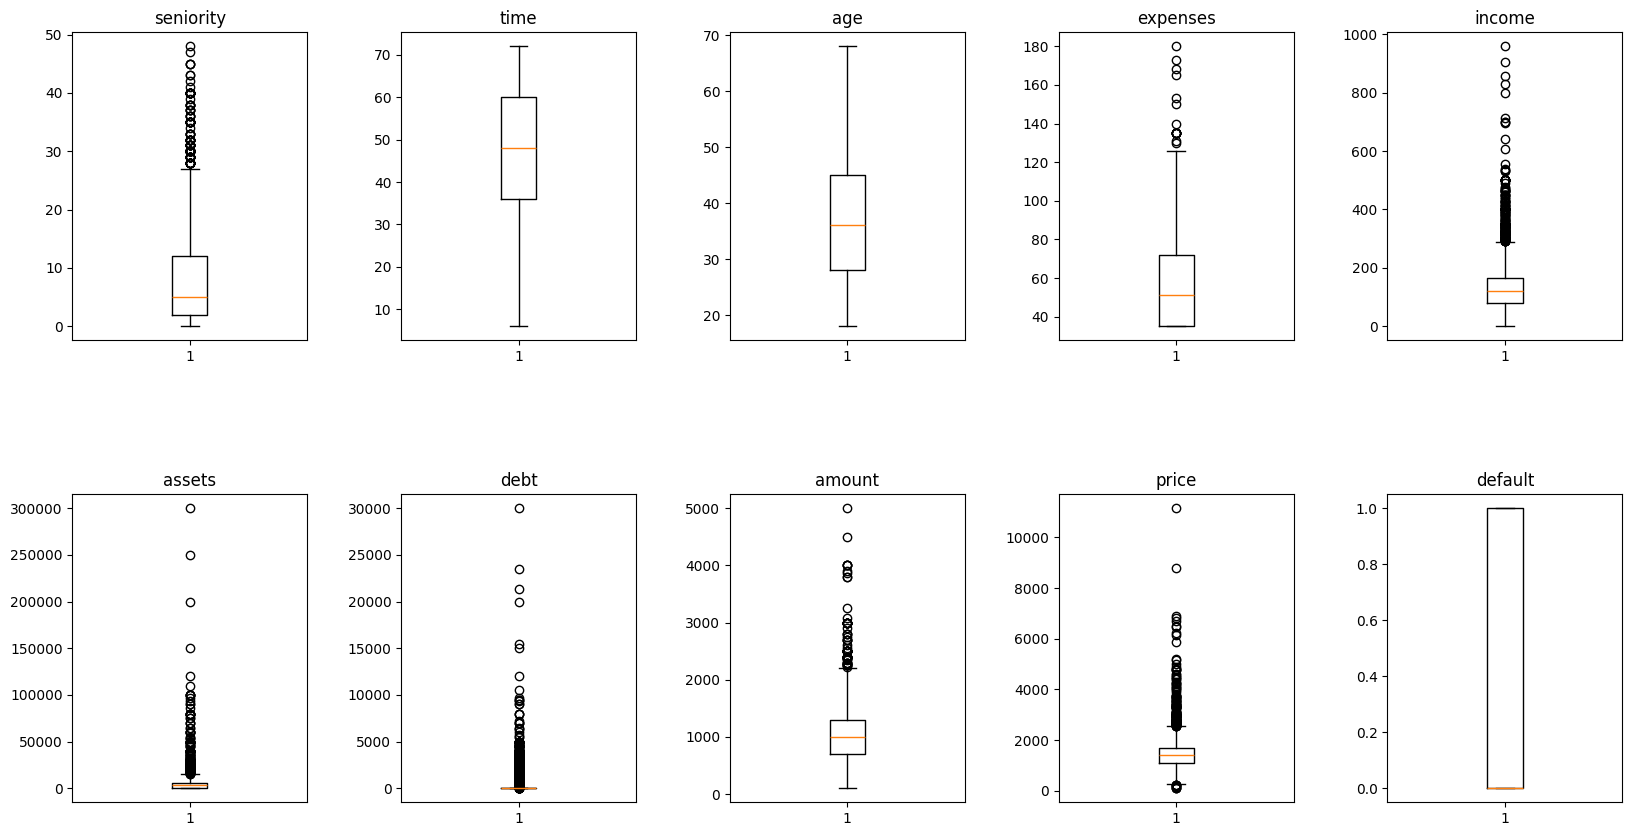

In [28]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
i = 0
for row in range(2):
  for col in range(5):
    ax.ravel()[i].boxplot(data[numerics[i]])
    ax.ravel()[i].set_title(numerics[i])
    i += 1

# Adjust spacing
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Increase space between plots

plt.show()

## 1.5 Truncating outliers

In [29]:
#A=data.shape[0]

In [30]:
#for var, lim in trunc.items():
  #data[var] = data[var].clip(upper=data[var].quantile(lim))

  #Tu código aquí

In [31]:
# Setting limits with quantiles lower= 0,05 and upper=0.95

limits = {'expenses':(data.expenses.quantile(0.05),data.expenses.quantile(0.95)),
          'income':(data.income.quantile(0.05),data.income.quantile(0.95)),
          'assets':(data.assets.quantile(0.05),data.assets.quantile(0.95)),
          #'debt':(data.debt.quantile(0.05),data.debt.quantile(0.95)),
          'amount':(data.amount.quantile(0.05),data.amount.quantile(0.95)),
          'price':(data.price.quantile(0.05),data.price.quantile(0.95))}
'''
Loops through each variable in limits.
Uses clip(lower, upper) to:
Set any values below the 5th percentile to the 5th percentile.
Set any values above the 95th percentile to the 95th percentile.
Leaves values within the range unchanged.
'''
for var, lim in limits.items():
  data[var] = data[var].clip(lower=lim[0],upper=lim[1])



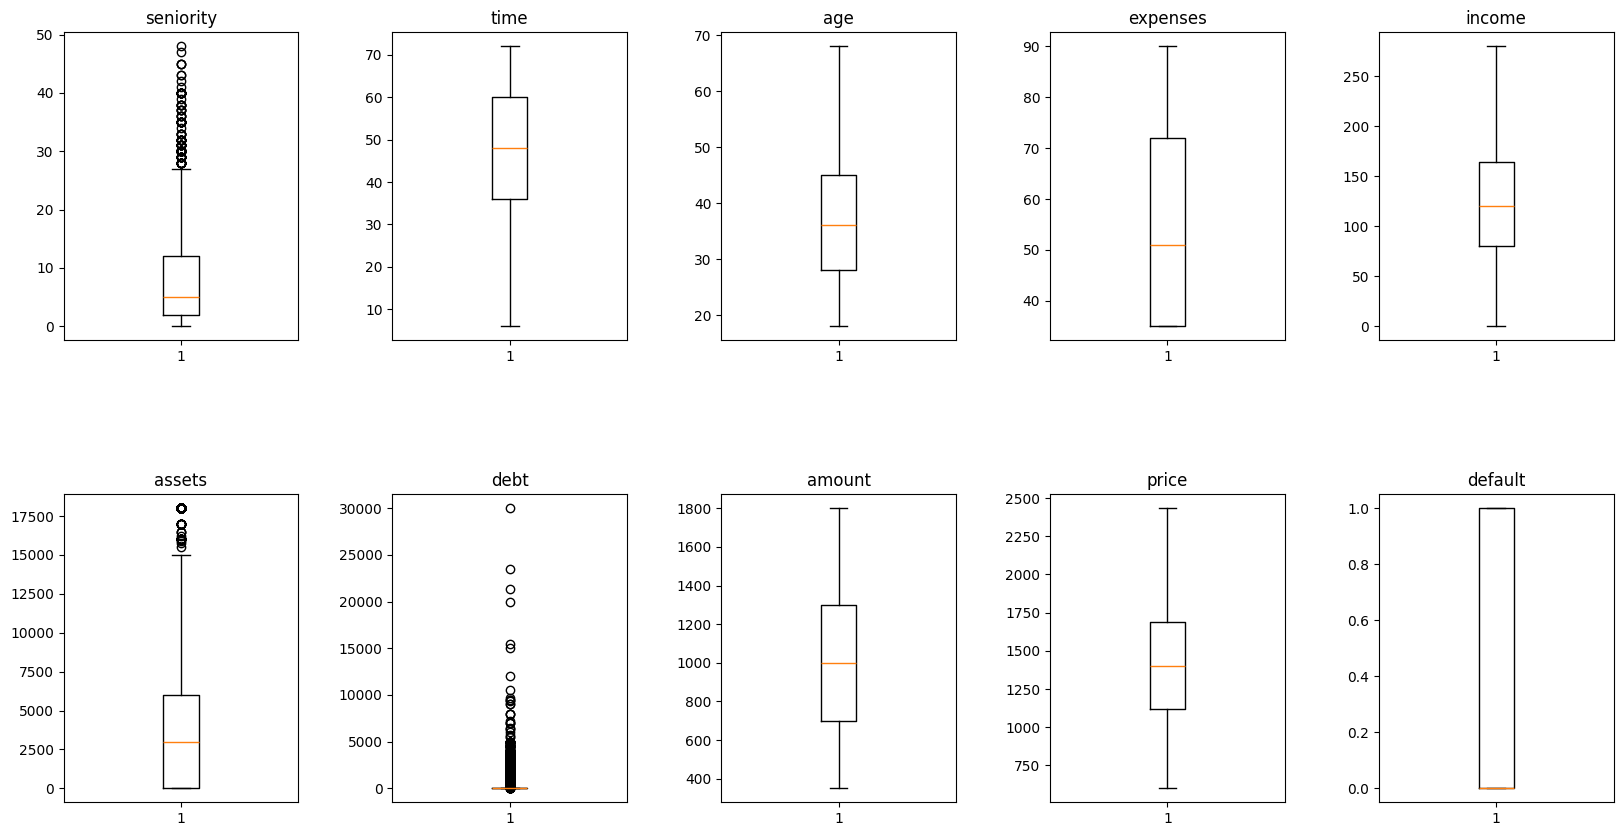

In [32]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))  # Bigger figure size

i = 0
for row in range(2):
    for col in range(5):
        if i < len(numerics):  # Avoid out-of-bounds error
            ax[row, col].boxplot(data[numerics[i]])
            ax[row, col].set_title(numerics[i])
        else:
            ax[row, col].axis("off")  # Hide unused subplots
        i += 1

# Adjust spacing
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Increase space between plots

plt.show()

In [33]:
data.shape

(4455, 15)

## 1.6 Transforming column 'debt' into binary

I will consider just two options: if the debt's amount is 0, the customer is debt free, otherwise he/she has debt

In [34]:
data['debt'].value_counts()

,count
debt,
0.00,3688
2000.00,59
1500.00,51
3000.00,46
1000.00,39
...,...
130.00,1
290.00,1
2432.00,1


In [35]:
data['debt'] = data['debt'].apply(lambda x: 0 if x == 0 else 1)

In [36]:
data['debt'].value_counts()

,count
debt,
0,3688
1,767


## 1.7 Describing categorical columns

In [37]:
cat_cols = data.select_dtypes('object')
cat_cols.describe()

,status,home,marital,records,job
count,4455,4455,4455,4455,4455
unique,3,7,6,2,5
top,ok,owner,married,no,fixed
freq,3200,2107,3241,3682,2806


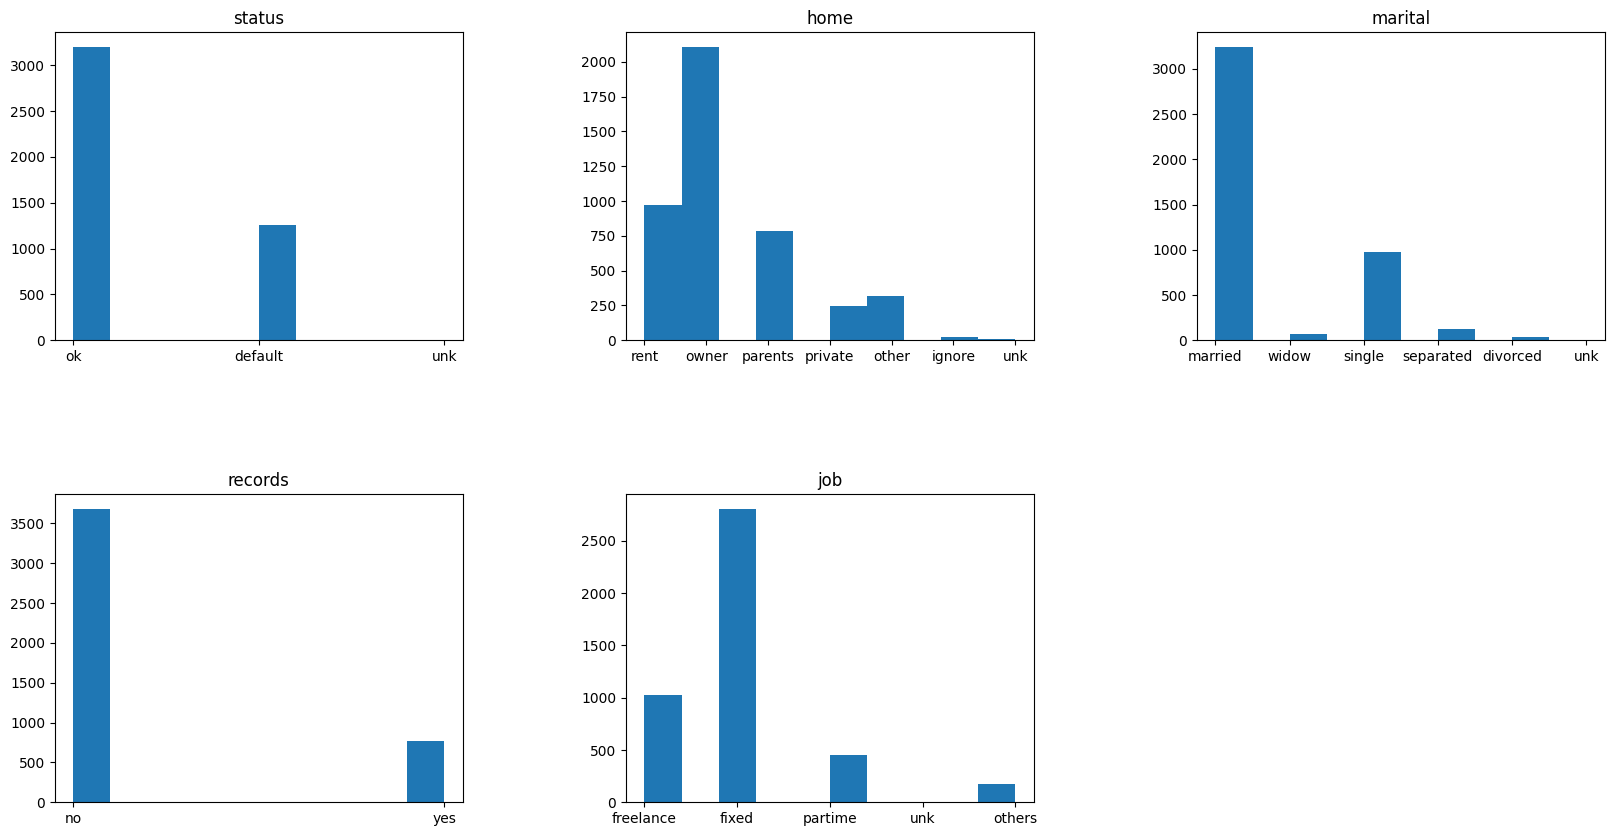

In [38]:
#Distribution of values in categorical columns
cat = cat_cols.columns
fig, ax = plt.subplots(2,3,figsize=(20,10))
i = 0
for row in range(2):
  for col in range(3):
    if i < len(cat):  # Check if 'i' is within the bounds of 'cat'
        ax.ravel()[i].hist(data[cat[i]],bins=10)
        ax.ravel()[i].set_title(cat[i])
        i += 1
    else:
        ax.ravel()[i].axis('off')  # Hide unused subplot if 'i' is out of bounds
        i += 1 #Still increment 'i'

# Adjust spacing
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Increase space between plots

plt.show()

## 1.8 Regrouping categories


### Column 'home'

In [39]:

data['home'].value_counts()

,count
home,
owner,2107
rent,973
parents,783
other,319
private,247
ignore,20
unk,6


In [40]:
#Obtaining percentage of default values on each type of column 'home'
data.groupby('home')['default'].value_counts(normalize=True)
#data.groupby('home')['default'].value_counts().

home     default
ignore   0         0.55
         1         0.45
other    0         0.54
         1         0.46
owner    0         0.81
         1         0.19
parents  0         0.70
         1         0.30
private  0         0.66
         1         0.34
rent     0         0.60
         1         0.40
unk      1         0.67
         0         0.33
Name: proportion, dtype: float64

In [41]:
#Adding low frequent values to 'other' category in column 'home' because 'default' percentage is pretty similar
data['home'] = data['home'].apply(lambda x: 'other' if x in ['ignore', 'unk','private'] else x)

In [42]:
data['home'].value_counts()

,count
home,
owner,2107
rent,973
parents,783
other,592


### Column 'marital'

In [43]:
data['marital'].value_counts()

,count
marital,
married,3241
single,978
separated,130
widow,67
divorced,38
unk,1


In [44]:
#Obtaining proportion of default values on each type of column 'marital'
data.groupby('marital')['default'].value_counts(normalize=True)

marital    default
divorced   0         0.63
           1         0.37
married    0         0.74
           1         0.26
separated  0         0.51
           1         0.49
single     0         0.66
           1         0.34
unk        0         1.00
widow      0         0.72
           1         0.28
Name: proportion, dtype: float64

In [45]:

data['marital'] = data['marital'].apply(lambda x: 'other' if x in ['separated','widow','divorced','unk'] else x)

In [46]:
data['marital'].value_counts()

,count
marital,
married,3241
single,978
other,236


### Column 'job'

In [47]:
data['job'].value_counts()

,count
job,
fixed,2806
freelance,1024
partime,452
others,171
unk,2


In [48]:
data['job'] = data['job'].apply(lambda x: 'others' if x in ['unk'] else x)

In [49]:
data['job'].value_counts()

,count
job,
fixed,2806
freelance,1024
partime,452
others,173


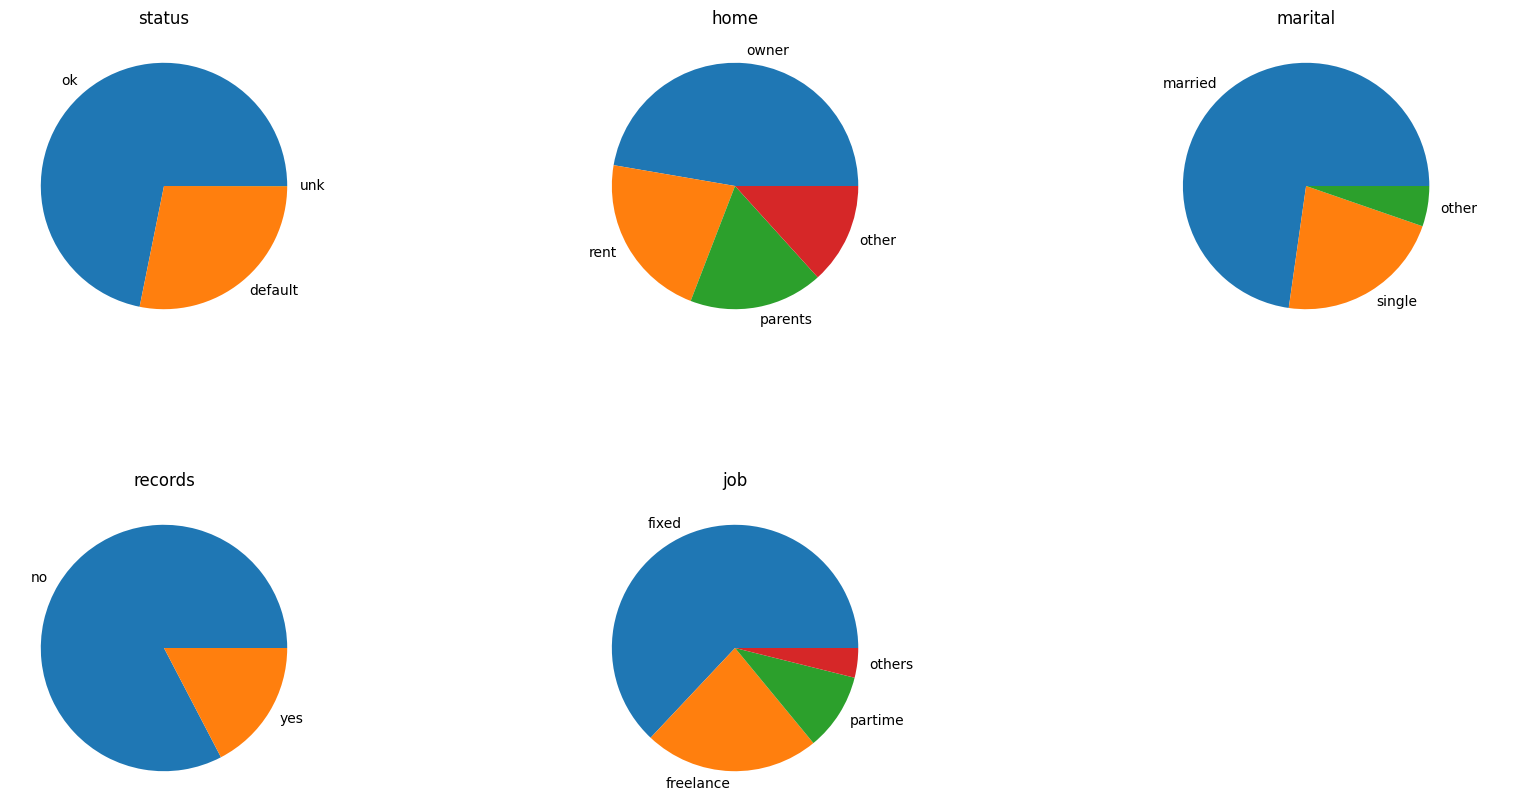

In [50]:
#Distribution of values in categorical columns
cat = cat_cols.columns
fig, ax = plt.subplots(2,3,figsize=(20,10))
i = 0
for row in range(2):
  for col in range(3):
    if i < len(cat):  # Check if 'i' is within the bounds of 'cat'
        # Changed the pie function to receive the value counts instead of the entire series and removed the bins argument.
        ax.ravel()[i].pie(data[cat[i]].value_counts(), labels = data[cat[i]].value_counts().index)
        ax.ravel()[i].set_title(cat[i])
        i += 1
    else:
        ax.ravel()[i].axis('off')  # Hide unused subplot if 'i' is out of bounds
        i += 1 #Still increment 'i'

# Adjust spacing
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Increase space between plots

## 1.9 Drop columns

In [51]:
data.drop(columns=['status'],inplace=True)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   seniority  4455 non-null   int64  
 1   home       4455 non-null   object 
 2   time       4455 non-null   int64  
 3   age        4455 non-null   int64  
 4   marital    4455 non-null   object 
 5   records    4455 non-null   object 
 6   job        4455 non-null   object 
 7   expenses   4455 non-null   int64  
 8   income     4455 non-null   float64
 9   assets     4455 non-null   float64
 10  debt       4455 non-null   int64  
 11  amount     4455 non-null   int64  
 12  price      4455 non-null   float64
 13  default    4455 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 487.4+ KB


#**2. Data Exploration**


---


## 2.1 Distribution of numerical columns

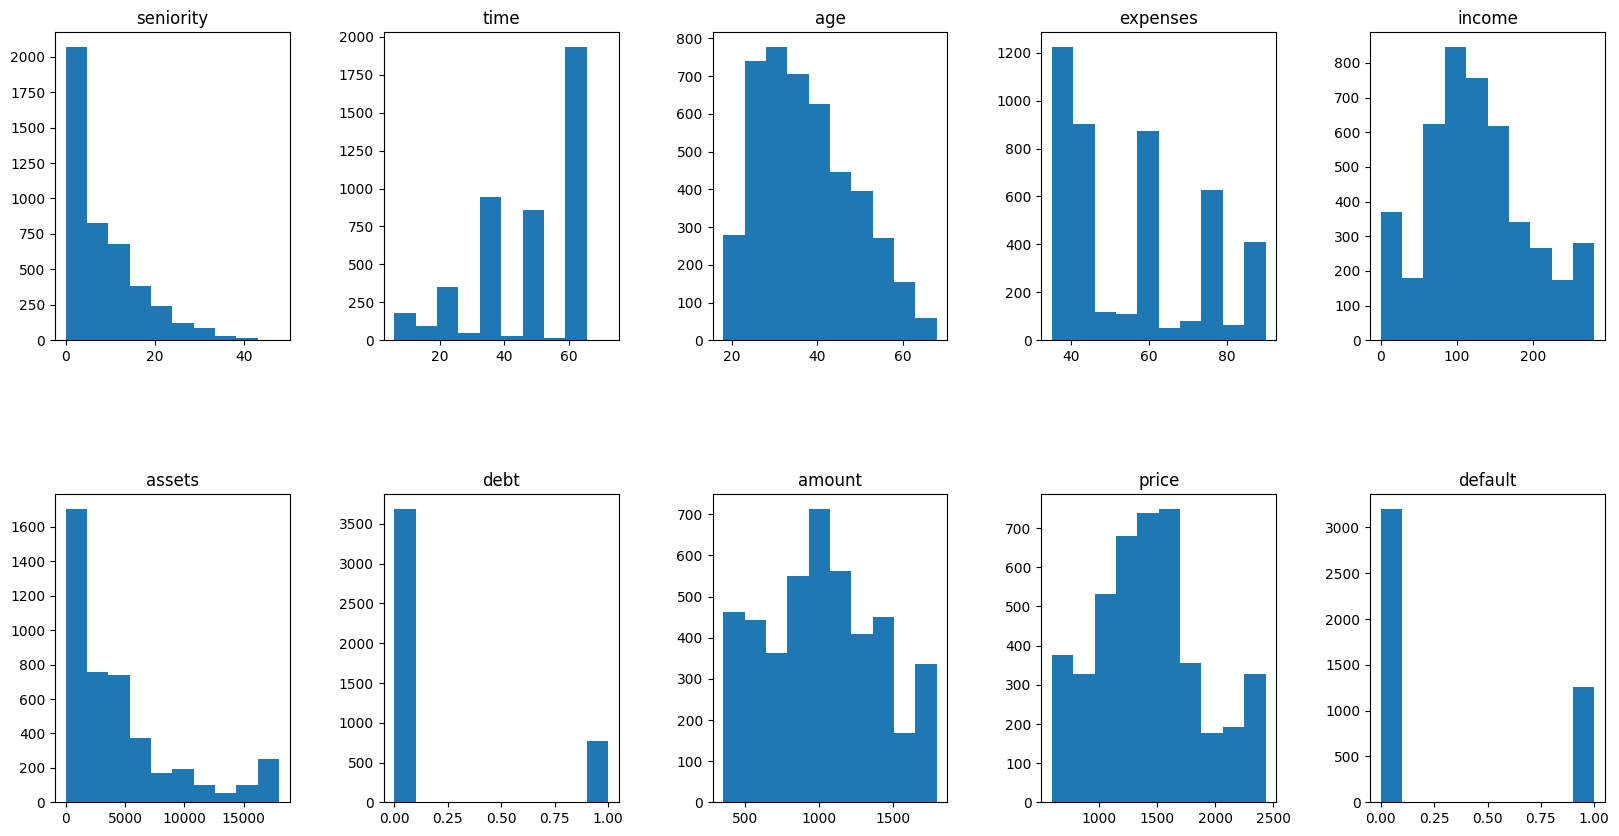

In [53]:
numerics = t_desc_num.columns
fig, ax = plt.subplots(2,5,figsize=(20,10))
i = 0
for row in range(2):
  for col in range(5):
    ax.ravel()[i].hist(data[numerics[i]],bins=10)
    ax.ravel()[i].set_title(numerics[i])
    i += 1

# Adjust spacing
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Increase space between plots

plt.show()

## 2.2 Cumulative distribution function(CDF)

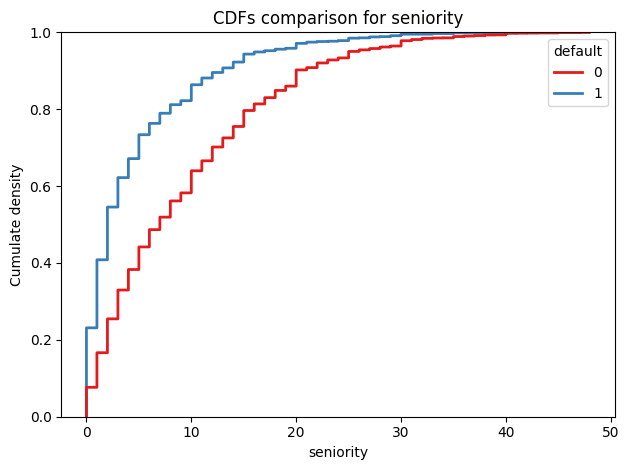

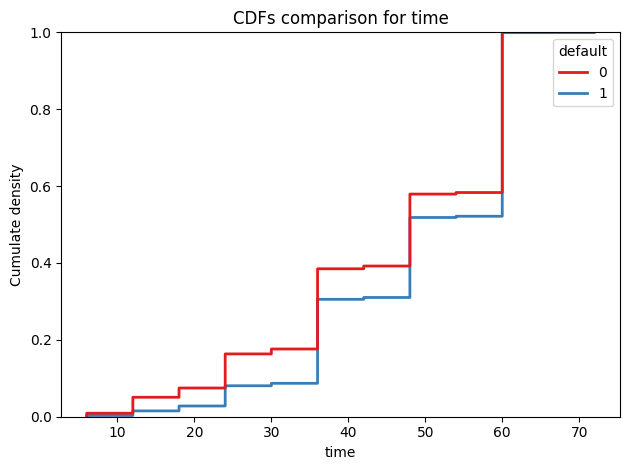

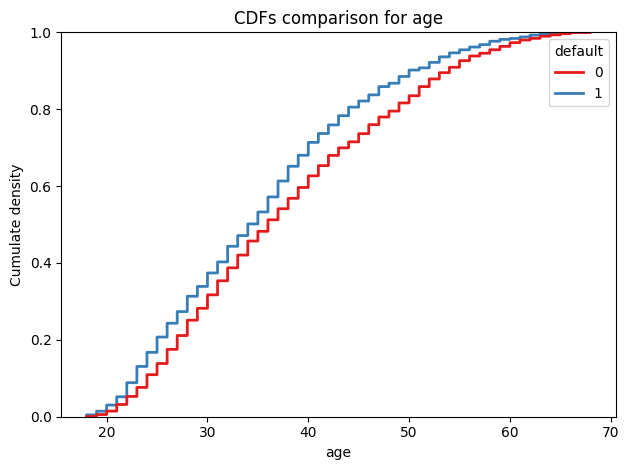

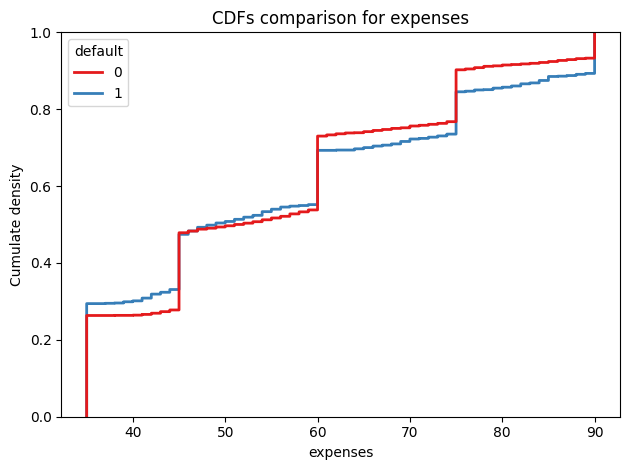

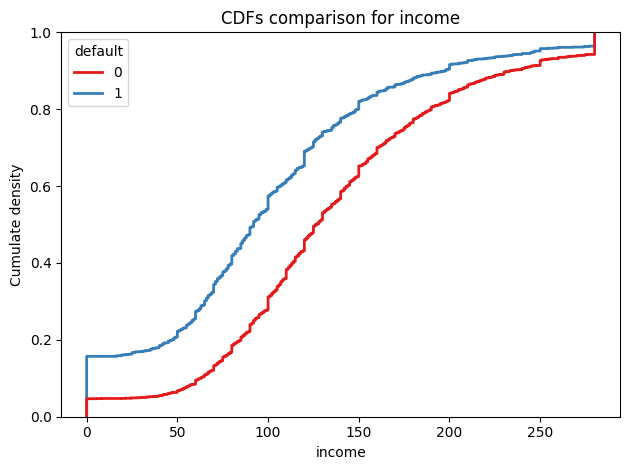

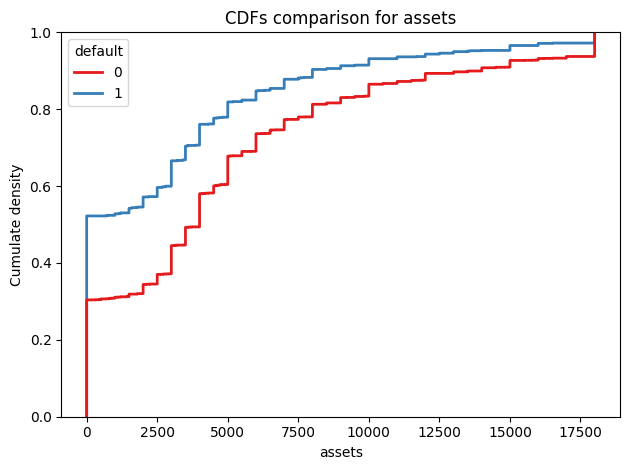

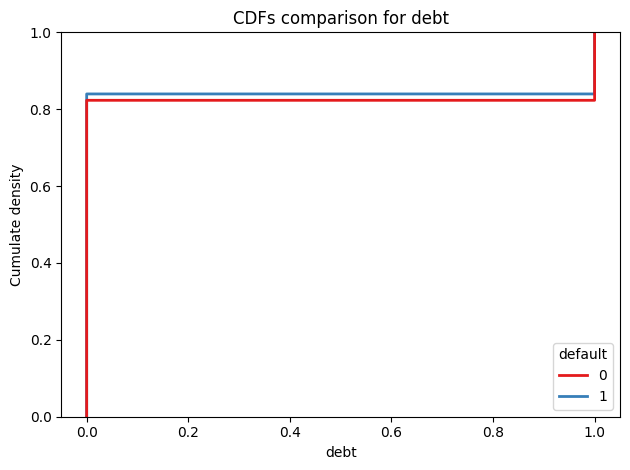

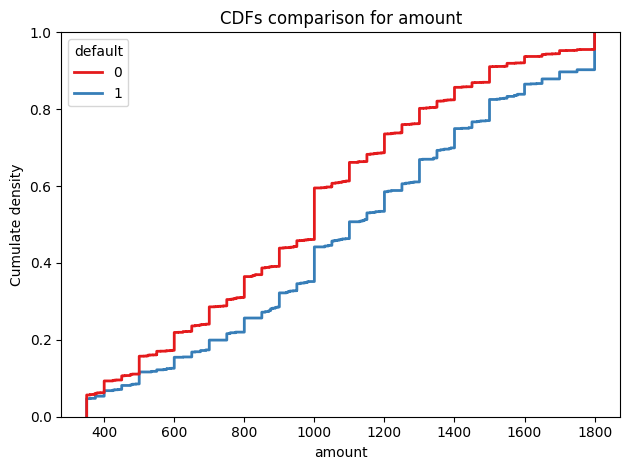

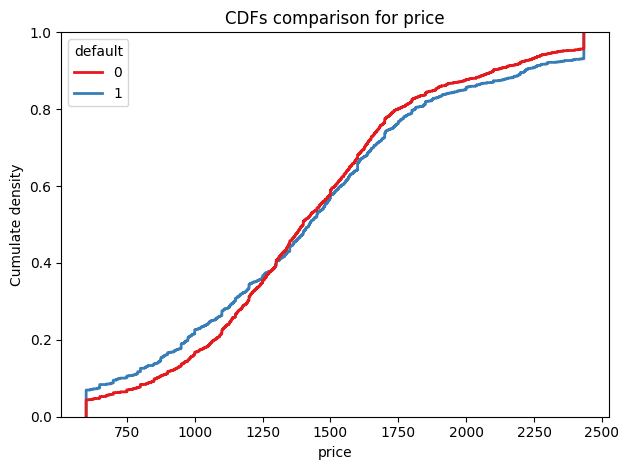

In [54]:
#Drop column 'default'
numerics = numerics.drop('default')
#Use ecdataplot to plot the segmented CDF by 'default'
for col in numerics:
  sns.ecdfplot(data=data,x=col,hue='default', palette='Set1', linewidth=2)
  plt.title(f'CDFs comparison for {col}')
  plt.ylabel('Cumulate density')
  plt.xlabel(col)
  plt.tight_layout()
  plt.show()




## 2.3 Categorical data distribution





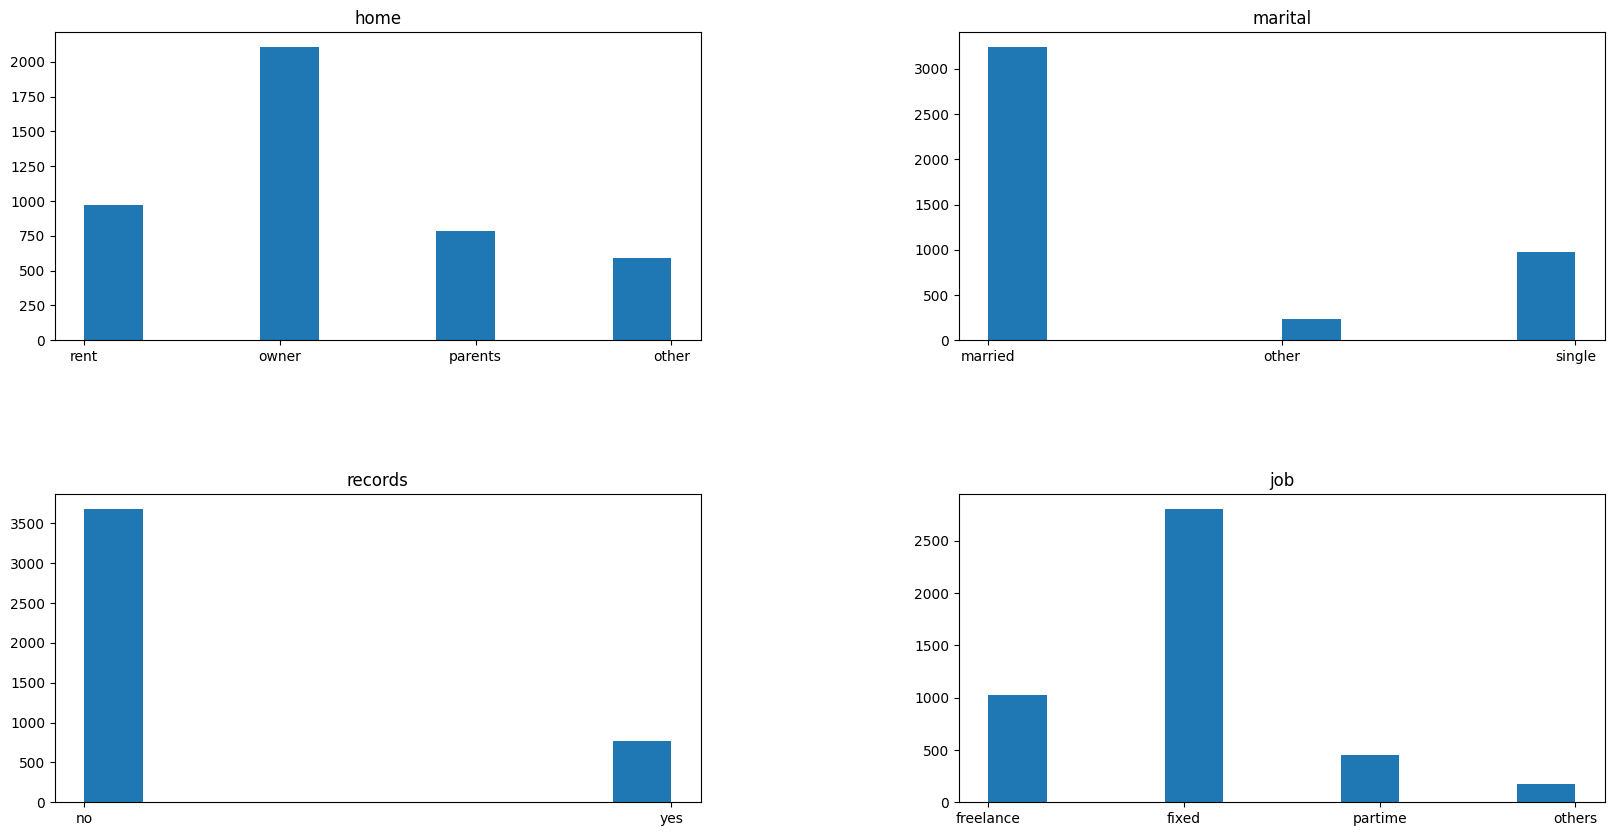

In [55]:
cualis = data.select_dtypes('object').columns
fig, ax = plt.subplots(2,2,figsize=(20,10))
i = 0
for row in range(2):
  for col in range(2):
    if i < len(cat):  # Check if 'i' is within the bounds of 'cat'
        ax.ravel()[i].hist(data[cualis[i]],bins=10)
        ax.ravel()[i].set_title(cualis[i])
        i += 1
    else:
        ax.ravel()[i].axis('off')  # Hide unused subplot if 'i' is out of bounds
        i += 1 #Still increment 'i'

# Adjust spacing
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Increase space between plots

plt.show()


## 2.4 Risk distribution

In [56]:
cat_cols = data.select_dtypes('object').columns

def risk_analysis(col):
  average_risk = data['default'].mean()
  grouped = data.groupby(col)['default'].mean()
  risk_ratio = grouped / average_risk
  return pd.DataFrame({'Risk':grouped,'Risk ratio':risk_ratio})  # Return the DataFrame

for col in cat_cols:
    print(risk_analysis(col))




         Risk  Risk ratio
home                     
other    0.41        1.46
owner    0.19        0.66
parents  0.30        1.06
rent     0.40        1.42
         Risk  Risk ratio
marital                  
married  0.26        0.91
other    0.41        1.46
single   0.34        1.19
         Risk  Risk ratio
records                  
no       0.22        0.80
yes      0.55        1.97
           Risk  Risk ratio
job                        
fixed      0.21        0.73
freelance  0.33        1.16
others     0.40        1.44
partime    0.60        2.13


<ipython-input-57-d3270dcdac20>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_df.index, y=risk_df['Risk ratio'], palette="coolwarm", alpha=0.7)


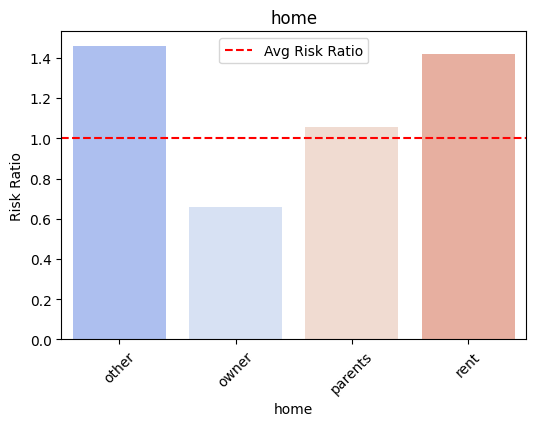

<ipython-input-57-d3270dcdac20>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_df.index, y=risk_df['Risk ratio'], palette="coolwarm", alpha=0.7)


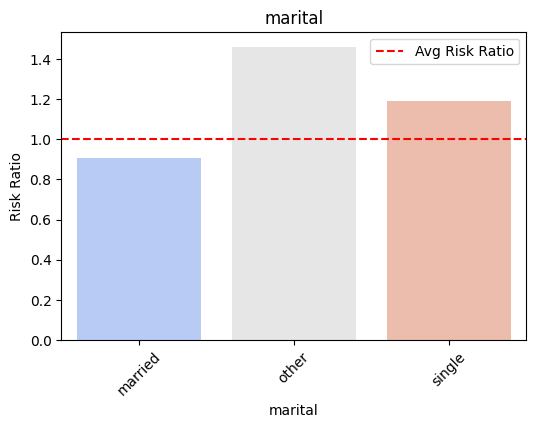

<ipython-input-57-d3270dcdac20>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_df.index, y=risk_df['Risk ratio'], palette="coolwarm", alpha=0.7)


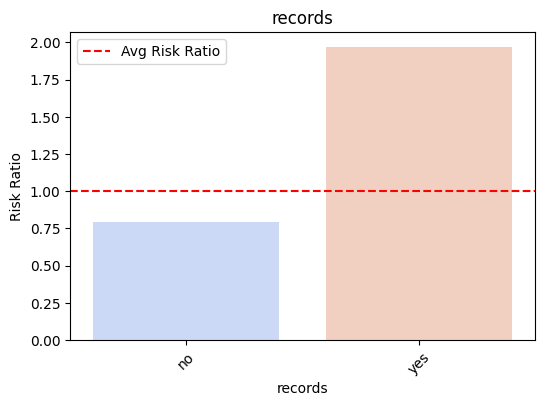

<ipython-input-57-d3270dcdac20>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_df.index, y=risk_df['Risk ratio'], palette="coolwarm", alpha=0.7)


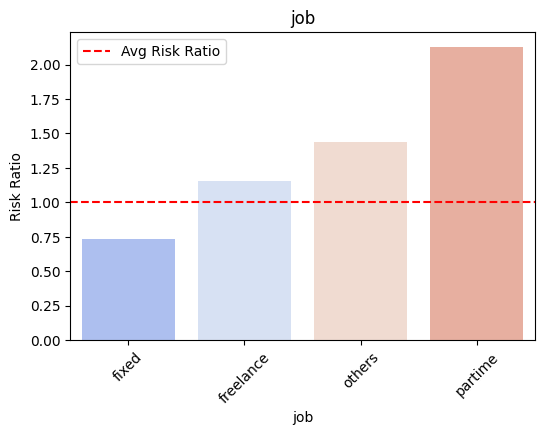

In [57]:
def plot_risk_analysis(data):
    cat_cols = data.select_dtypes('object').columns
    average_risk = data['default'].mean()

    for col in cat_cols:
        risk_df = risk_analysis(col)  # Get the risk DataFrame

        plt.figure(figsize=(6, 4))
        sns.barplot(x=risk_df.index, y=risk_df['Risk ratio'], palette="coolwarm", alpha=0.7)

        # Add a horizontal line for the average risk ratio
        plt.axhline(y=1, color='red', linestyle='--', label="Avg Risk Ratio")

        plt.xlabel(col)
        plt.ylabel("Risk Ratio")
        plt.title(col)
        plt.xticks(rotation=45)
        plt.legend()

        plt.show()

# Call the function to generate plots
plot_risk_analysis(data)

#**3. Models construction**


---

## 3.1 Data partitioning


In [58]:
data.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129.00,0.00,0,800,846.00,0
1,17,rent,60,58,other,no,fixed,48,131.00,0.00,0,1000,1658.00,0
2,10,owner,36,46,married,yes,freelance,90,200.00,3000.00,0,1800,2433.60,1
3,0,rent,60,24,single,no,fixed,63,182.00,2500.00,0,900,1325.00,0
4,0,rent,36,26,single,no,fixed,46,107.00,0.00,0,350,910.00,0


In [59]:
credit_risk_clean = data.copy()

In [60]:
credit_risk_clean.to_csv('credit_risk_clean.csv',index=False)

In [61]:
x = data.drop(columns='default')
x = pd.get_dummies(x)
y = data['default']

In [62]:
# Selecting boolean columns
boolean_columns = x.select_dtypes(include='bool').columns

# Convert boolean columns to integers
x[boolean_columns] = x[boolean_columns].astype(int)

In [63]:
x.head()

,seniority,time,age,expenses,income,assets,debt,amount,price,home_other,home_owner,home_parents,home_rent,marital_married,marital_other,marital_single,records_no,records_yes,job_fixed,job_freelance,job_others,job_partime
0,9,60,30,73,129.00,0.00,0,800,846.00,0,0,0,1,1,0,0,1,0,0,1,0,0
1,17,60,58,48,131.00,0.00,0,1000,1658.00,0,0,0,1,0,1,0,1,0,1,0,0,0
2,10,36,46,90,200.00,3000.00,0,1800,2433.60,0,1,0,0,1,0,0,0,1,0,1,0,0
3,0,60,24,63,182.00,2500.00,0,900,1325.00,0,0,0,1,0,0,1,1,0,1,0,0,0
4,0,36,26,46,107.00,0.00,0,350,910.00,0,0,0,1,0,0,1,1,0,1,0,0,0


In [64]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   seniority        4455 non-null   int64  
 1   time             4455 non-null   int64  
 2   age              4455 non-null   int64  
 3   expenses         4455 non-null   int64  
 4   income           4455 non-null   float64
 5   assets           4455 non-null   float64
 6   debt             4455 non-null   int64  
 7   amount           4455 non-null   int64  
 8   price            4455 non-null   float64
 9   home_other       4455 non-null   int64  
 10  home_owner       4455 non-null   int64  
 11  home_parents     4455 non-null   int64  
 12  home_rent        4455 non-null   int64  
 13  marital_married  4455 non-null   int64  
 14  marital_other    4455 non-null   int64  
 15  marital_single   4455 non-null   int64  
 16  records_no       4455 non-null   int64  
 17  records_yes   

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## 3.2 Classification models

### 3.2.1 Logistic Regression

#### 3.2.1.1 Adjusting model without balancing

In [66]:
# Create a logistic regression model (Reg_Logit)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler saved as 'scaler.pkl'")

# max_iter increased to ensure convergence
reg_logit = LogisticRegression(max_iter=1000)
reg_logit.fit(X_train_scaled, y_train) # Train the model


✅ Scaler saved as 'scaler.pkl'


LogisticRegression(max_iter=1000)

##### Initial prediction

In [67]:
clas_logit = reg_logit.predict(X_test_scaled)
pd.crosstab(y_test, clas_logit,margins=True)

col_0,0,1,All
default,,,
0,887,58,945
1,207,185,392
All,1094,243,1337


In [68]:
print(classification_report(y_test, clas_logit))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       945
           1       0.76      0.47      0.58       392

    accuracy                           0.80      1337
   macro avg       0.79      0.71      0.73      1337
weighted avg       0.80      0.80      0.79      1337



##### **ROC**

In [69]:
# Probability prediction
y_pred_proba = reg_logit.predict_proba(X_test_scaled)[:, 1]

In [70]:
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.8451409135082604


In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Find the optimal threshold (Youden's J statistic)
optimal_idx = np.argmax(tpr - fpr)  # Maximize (TPR - FPR)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal cut-off point: {optimal_threshold}")

Optimal cut-off point: 0.23529178788230742


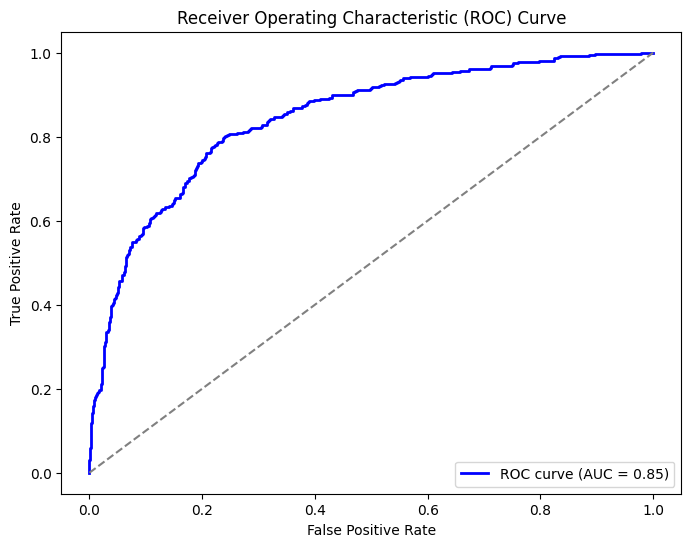

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Compute AUC using roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add legend
plt.legend(loc='lower right')

# Show plot
plt.show()

##### **Re**-trained model considering optimal cut-off point

In [73]:
# predict_proba returns probabilities for both classes, we need the second column (index 1)
y_pred_proba = reg_logit.predict_proba(X_test_scaled)[:, 1]

# Apply your optimal threshold to create new predictions
optimal_threshold = 0.23529178788230742
clas_logit_auc = (y_pred_proba >= optimal_threshold).astype(int)

# Now create your crosstab with the new predictions
new_crosstab = pd.crosstab(y_test, clas_logit_auc, margins=True)
print(new_crosstab)



col_0      0    1   All
default                
0        717  228   945
1         78  314   392
All      795  542  1337


In [74]:
# Calculate and print classification report for the new model
print(classification_report(y_test, clas_logit_auc))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       945
           1       0.58      0.80      0.67       392

    accuracy                           0.77      1337
   macro avg       0.74      0.78      0.75      1337
weighted avg       0.81      0.77      0.78      1337



#### 3.2.1.2 Adjusting model balanced

In [75]:
# Now balance only the training data
from imblearn.over_sampling import SMOTE  # or any other balancing method

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Train the model on balanced training data
reg_logit2 = LogisticRegression(max_iter=1000)
reg_logit2.fit(X_train_balanced, y_train_balanced)

# Make predictions on the original (unbalanced) scaled test data
clas_logit2 = reg_logit2.predict(X_test_scaled)
pd.crosstab(y_test, clas_logit2,margins=True)

col_0,0,1,All
default,,,
0,763,182,945
1,106,286,392
All,869,468,1337


In [76]:
print(classification_report(y_test, clas_logit2))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       945
           1       0.61      0.73      0.67       392

    accuracy                           0.78      1337
   macro avg       0.74      0.77      0.75      1337
weighted avg       0.80      0.78      0.79      1337



#### score

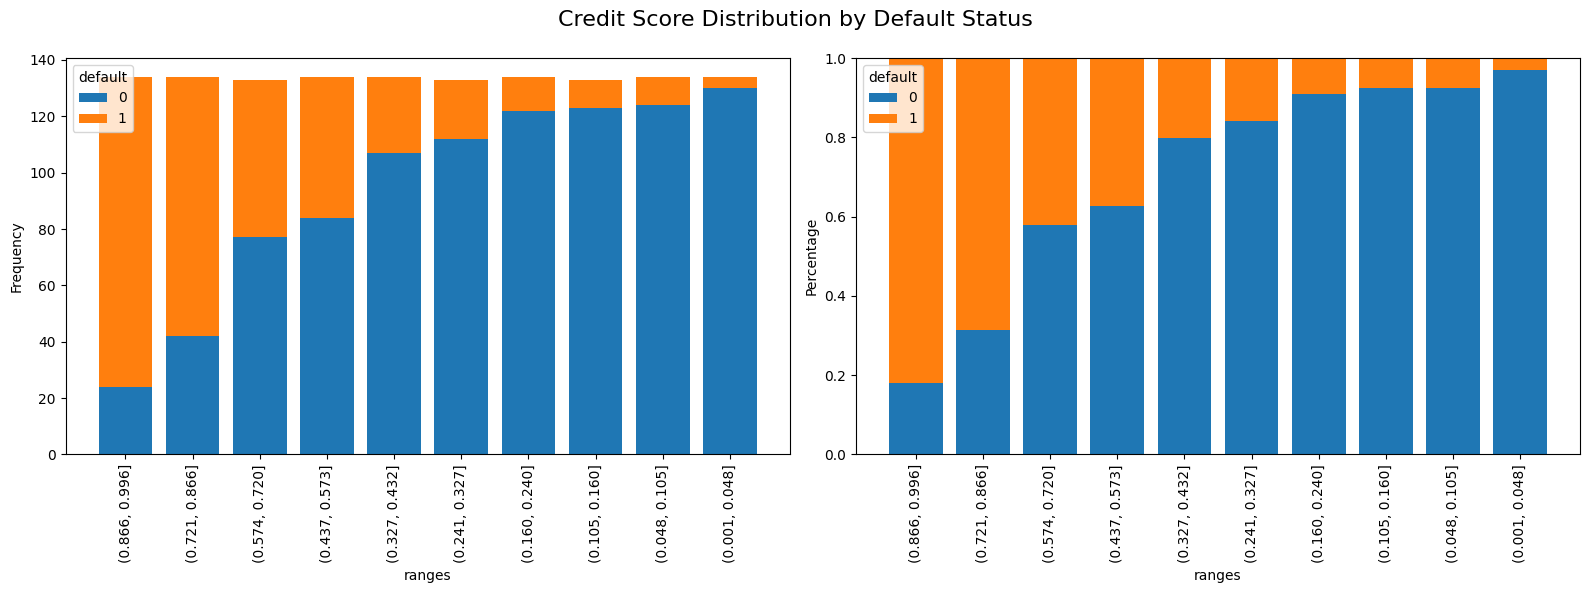

Default rates by score decile (lower decile = higher risk):
Decile 0: 82.09%
Decile 1: 68.66%
Decile 2: 42.11%
Decile 3: 37.31%
Decile 4: 20.15%
Decile 5: 15.79%
Decile 6: 8.96%
Decile 7: 7.52%
Decile 8: 7.46%
Decile 9: 2.99%


In [77]:

from sklearn.preprocessing import KBinsDiscretizer

# Assuming you already have your model and predictions
# X_test_scaled - your scaled test features
# y_test - your actual target values
# model - your trained model (using SMOTE approach)

# Get the predicted probabilities for the positive class (default)
# If you haven't done this yet:
y_pred_proba = reg_logit2.predict_proba(X_test_scaled)[:, 1]

# Create a DataFrame with the actual outcomes and predicted probabilities
results_df = pd.DataFrame({
    'actual_default': y_test,
    'default_probability': y_pred_proba
})

# Create deciles (10 equal-sized bins) based on default probability
# Higher probability = higher risk
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
results_df['score_decile'] = discretizer.fit_transform(results_df[['default_probability']])

# Map to reverse the order so higher decile = lower risk (traditional credit scoring)
# This step is optional if you prefer higher numbers to represent higher risk
max_decile = results_df['score_decile'].max()
results_df['score_decile'] = max_decile - results_df['score_decile']

# Get the decile boundaries for labeling
boundaries = []
for i in range(10):
    min_val = results_df[results_df['score_decile'] == i]['default_probability'].min()
    max_val = results_df[results_df['score_decile'] == i]['default_probability'].max()
    boundaries.append(f"({min_val:.3f}, {max_val:.3f}]")

# Count defaults and non-defaults in each decile
grouped = results_df.groupby(['score_decile', 'actual_default']).size().unstack(fill_value=0)

# Rename columns for clarity
if 0 in grouped.columns and 1 in grouped.columns:
    grouped.columns = ['non_default', 'default']
else:
    if 0 not in grouped.columns:
        grouped['non_default'] = 0
    if 1 not in grouped.columns:
        grouped['default'] = 0
    grouped = grouped[['non_default', 'default']]

# Calculate totals for each decile
grouped['total'] = grouped['non_default'] + grouped['default']

# Calculate default rate for each decile
grouped['default_rate'] = grouped['default'] / grouped['total']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the count chart
bottom_vals = np.zeros(len(grouped))
for col, color, label in zip(['non_default', 'default'], ['#1f77b4', '#ff7f0e'], ['0', '1']):
    ax1.bar(boundaries, grouped[col], bottom=bottom_vals, label=label, color=color)
    bottom_vals += grouped[col].values

# Plot the percentage chart
ax2.bar(boundaries, grouped['non_default'] / grouped['total'], label='0', color='#1f77b4')
ax2.bar(boundaries, grouped['default'] / grouped['total'], bottom=grouped['non_default'] / grouped['total'],
        label='1', color='#ff7f0e')

# Customize the count chart
ax1.set_xlabel('ranges')
ax1.set_ylabel('Frequency')
ax1.legend(title='default')
ax1.tick_params(axis='x', rotation=90)

# Customize the percentage chart
ax2.set_xlabel('ranges')
ax2.set_ylabel('Percentage')
ax2.set_ylim(0, 1)
ax2.legend(title='default')
ax2.tick_params(axis='x', rotation=90)

# Add a title to the figure
plt.suptitle('Credit Score Distribution by Default Status', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()

# Print default rates by decile for analysis
print("Default rates by score decile (lower decile = higher risk):")
for i in range(10):
    if i in grouped.index:
        print(f"Decile {i}: {grouped.loc[i, 'default_rate']:.2%}")

### 3.2.2 Decision Tree

#### 3.2.2.1 Adjusting model without balancing

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
reg_tree = DecisionTreeClassifier(random_state=42)
# Define the hyperparameter grid
param_grid = {'max_depth': range(1, 20)}  # Try depths from 1 to 20

# Perform GridSearchCV
grid_search = GridSearchCV(reg_tree, param_grid, cv=5, scoring='accuracy')  # Change scoring based on your need
grid_search.fit(X_train_scaled, y_train)

# Get the best depth
best_depth = grid_search.best_params_['max_depth']
print(f"Best Depth: {best_depth}")

Best Depth: 6


In [80]:
# Train the final model with the best depth
reg_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
reg_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

##### Initial prediction

In [81]:
clas_tree = reg_tree.predict(X_test_scaled)
pd.crosstab(y_test, clas_tree,margins=True)

col_0,0,1,All
default,,,
0,855,90,945
1,228,164,392
All,1083,254,1337


In [82]:
print(classification_report(y_test, clas_tree))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       945
           1       0.65      0.42      0.51       392

    accuracy                           0.76      1337
   macro avg       0.72      0.66      0.68      1337
weighted avg       0.75      0.76      0.74      1337



##### ROC

In [83]:
# Predicción de probabilidades
y_pred_proba = reg_tree.predict_proba(X_test_scaled)[:, 1]

In [84]:
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.782592322643343


In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Find the optimal threshold (Youden's J statistic)
optimal_idx = np.argmax(tpr - fpr)  # Maximize (TPR - FPR)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal cut-off point: {optimal_threshold}")

Optimal cut-off point: 0.19117647058823528


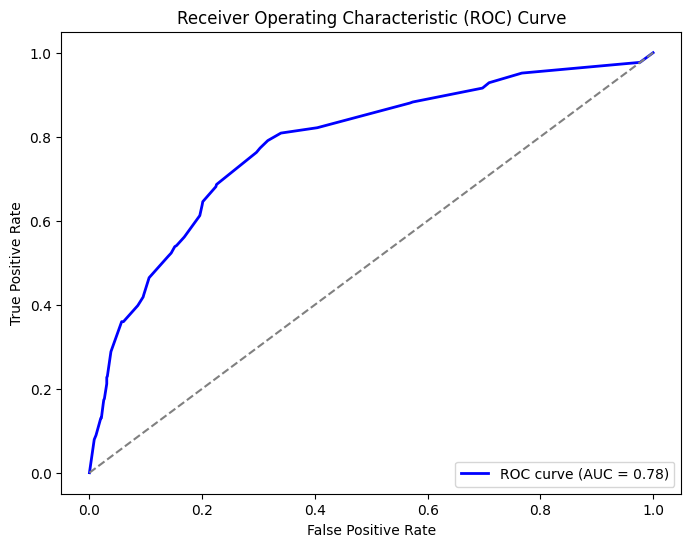

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Compute AUC using roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add legend
plt.legend(loc='lower right')

# Show plot
plt.show()

##### Re-trained model considering optimal cut-off point

In [87]:
# predict_proba returns probabilities for both classes, we need the second column (index 1)
y_pred_proba = reg_tree.predict_proba(X_test_scaled)[:, 1]

# Apply your optimal threshold to create new predictions
optimal_threshold = 0.19117647058823528
clas_tree_auc = (y_pred_proba >= optimal_threshold).astype(int)

# Now create your crosstab with the new predictions
new_crosstab = pd.crosstab(y_test, clas_tree_auc, margins=True)
print(new_crosstab)


col_0      0    1   All
default                
0        646  299   945
1         82  310   392
All      728  609  1337


In [88]:
print(classification_report(y_test, clas_tree_auc))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77       945
           1       0.51      0.79      0.62       392

    accuracy                           0.72      1337
   macro avg       0.70      0.74      0.70      1337
weighted avg       0.78      0.72      0.73      1337



#### 3.2.2.2 Adjusting model balanced

In [89]:
# Train the model on balanced training data
reg_tree2 = DecisionTreeClassifier(max_depth=best_depth,random_state=42)
reg_tree2.fit(X_train_balanced, y_train_balanced)

# Make predictions on the original (unbalanced) scaled test data
clas_tree2 = reg_tree2.predict(X_test_scaled)
pd.crosstab(y_test, clas_tree2,margins=True)

col_0,0,1,All
default,,,
0,744,201,945
1,122,270,392
All,866,471,1337


In [90]:
print(classification_report(y_test, clas_tree2))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       945
           1       0.57      0.69      0.63       392

    accuracy                           0.76      1337
   macro avg       0.72      0.74      0.72      1337
weighted avg       0.78      0.76      0.76      1337



#### score

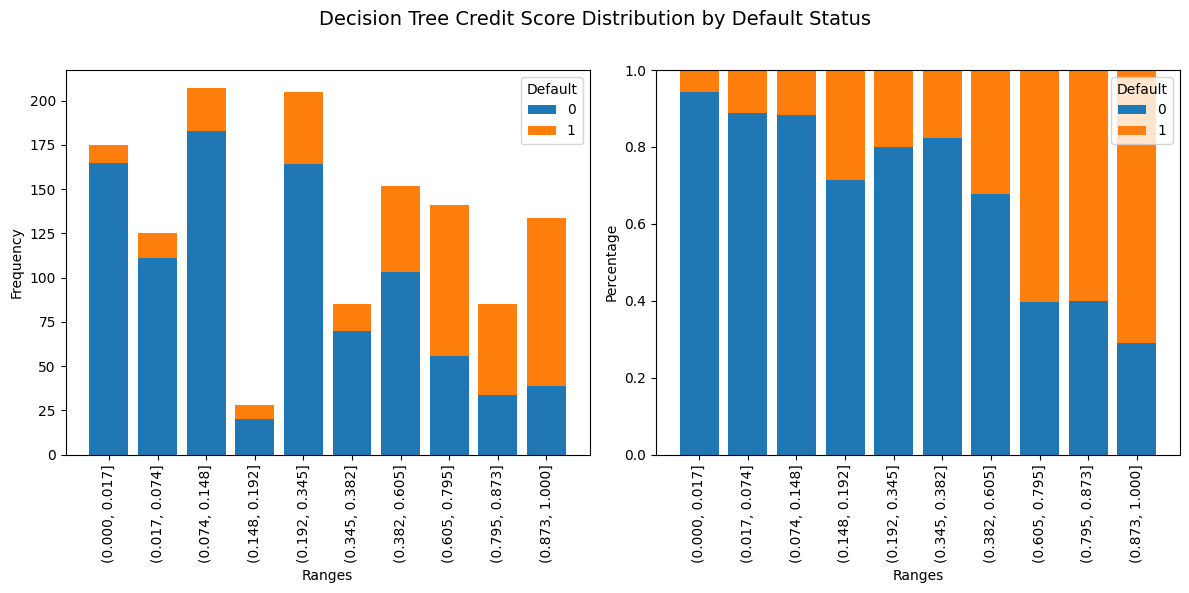

Default rates by score decile (lower decile = higher risk):
Decile 0: 70.90%
Decile 1: 60.00%
Decile 2: 60.28%
Decile 3: 32.24%
Decile 4: 17.65%
Decile 5: 20.00%
Decile 6: 28.57%
Decile 7: 11.59%
Decile 8: 11.20%
Decile 9: 5.71%


In [91]:


# Get predicted probabilities for the positive class (default)
y_pred_proba = reg_tree2.predict_proba(X_test_scaled)[:, 1]

# Create a DataFrame with actual outcomes and predicted probabilities
results_df = pd.DataFrame({
    'actual_default': y_test,
    'default_probability': y_pred_proba
})

# Ensure we create exactly 10 bins
results_df['score_decile'], bins = pd.qcut(
    results_df['default_probability'],
    q=10,
    labels=False,
    retbins=True,
    duplicates='drop'
)

# Reverse order: lower decile = higher risk
results_df['score_decile'] = 9 - results_df['score_decile']

# Generate bin range labels
bin_labels = [f"({bins[i]:.3f}, {bins[i+1]:.3f}]" for i in range(len(bins) - 1)]

# Count defaults and non-defaults in each decile
grouped = results_df.groupby(['score_decile', 'actual_default']).size().unstack(fill_value=0)

# Ensure both classes exist
if 0 in grouped.columns and 1 in grouped.columns:
    grouped.columns = ['non_default', 'default']
else:
    grouped['non_default'] = grouped.get(0, 0)
    grouped['default'] = grouped.get(1, 0)
    grouped = grouped[['non_default', 'default']]

# Calculate totals and default rate
grouped['total'] = grouped['non_default'] + grouped['default']
grouped['default_rate'] = grouped['default'] / grouped['total']

# Re-index so the bins appear in correct order
grouped = grouped.sort_index(ascending=False)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Stacked bar plot (count)
bottom_vals = np.zeros(len(grouped))
for col, color, label in zip(['non_default', 'default'], ['#1f77b4', '#ff7f0e'], ['0', '1']):
    ax1.bar(bin_labels, grouped[col], bottom=bottom_vals, label=label, color=color)
    bottom_vals += grouped[col].values

# Stacked bar plot (percentage)
ax2.bar(bin_labels, grouped['non_default'] / grouped['total'], label='0', color='#1f77b4')
ax2.bar(bin_labels, grouped['default'] / grouped['total'], bottom=grouped['non_default'] / grouped['total'],
        label='1', color='#ff7f0e')

# Customize count chart
ax1.set_xlabel('Ranges')
ax1.set_ylabel('Frequency')
ax1.legend(title='Default')
ax1.tick_params(axis='x', rotation=90)

# Customize percentage chart
ax2.set_xlabel('Ranges')
ax2.set_ylabel('Percentage')
ax2.set_ylim(0, 1)
ax2.legend(title='Default')
ax2.tick_params(axis='x', rotation=90)

# Adjust layout and title
plt.suptitle('Decision Tree Credit Score Distribution by Default Status', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)

# Show plot
plt.show()

# Print default rates
print("Default rates by score decile (lower decile = higher risk):")
for i in range(10):
    if i in grouped.index:
        print(f"Decile {i}: {grouped.loc[i, 'default_rate']:.2%}")


### 3.2.3 Random Forest

#### 3.2.3.1 Adjusting model without balancing

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
reg_forest = RandomForestClassifier(random_state=42)
reg_forest.fit(X_train_scaled, y_train)
# Save the trained model
joblib.dump(reg_forest, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl' ✅")

Model saved as 'random_forest_model.pkl' ✅


##### Initial prediction

In [94]:
clas_forest = reg_forest.predict(X_test_scaled)
pd.crosstab(y_test, clas_forest,margins=True)

col_0,0,1,All
default,,,
0,871,74,945
1,212,180,392
All,1083,254,1337


In [95]:
print(classification_report(y_test, clas_forest))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       945
           1       0.71      0.46      0.56       392

    accuracy                           0.79      1337
   macro avg       0.76      0.69      0.71      1337
weighted avg       0.78      0.79      0.77      1337



##### ROC

In [96]:
# Predicción de probabilidades
y_pred_proba = reg_forest.predict_proba(X_test_scaled)[:, 1]

In [97]:
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.8420837382572076


In [98]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Find the optimal threshold (Youden's J statistic)
optimal_idx = np.argmax(tpr - fpr)  # Maximize (TPR - FPR)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal cut-off point: {optimal_threshold}")

Optimal cut-off point: 0.28


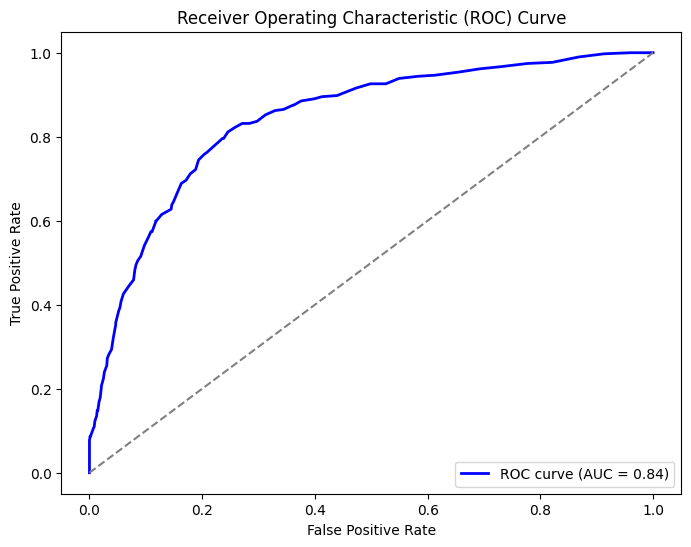

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Compute AUC using roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add legend
plt.legend(loc='lower right')

# Show plot
plt.show()

##### Re-trained model considering optimal cut-off point

In [100]:
# predict_proba returns probabilities for both classes, we need the second column (index 1)
y_pred_proba = reg_forest.predict_proba(X_test_scaled)[:, 1]

# Apply your optimal threshold to create new predictions
optimal_threshold = 0.28
clas_forest_auc = (y_pred_proba >= optimal_threshold).astype(int)

# Now create your crosstab with the new predictions
new_crosstab = pd.crosstab(y_test, clas_forest_auc, margins=True)
print(new_crosstab)


col_0      0    1   All
default                
0        713  232   945
1         74  318   392
All      787  550  1337


In [101]:
print(classification_report(y_test, clas_forest_auc))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       945
           1       0.58      0.81      0.68       392

    accuracy                           0.77      1337
   macro avg       0.74      0.78      0.75      1337
weighted avg       0.81      0.77      0.78      1337



#### 3.2.3.2 Adjusting model balanced

In [102]:
# Train the model on balanced training data
reg_forest2 = RandomForestClassifier(random_state=42)
reg_forest2.fit(X_train_balanced, y_train_balanced)

# Make predictions on the original (unbalanced) scaled test data
clas_forest2 = reg_forest2.predict(X_test_scaled)
pd.crosstab(y_test, clas_forest2,margins=True)

col_0,0,1,All
default,,,
0,829,116,945
1,156,236,392
All,985,352,1337


In [103]:
print(classification_report(y_test, clas_forest2))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       945
           1       0.67      0.60      0.63       392

    accuracy                           0.80      1337
   macro avg       0.76      0.74      0.75      1337
weighted avg       0.79      0.80      0.79      1337



#### score

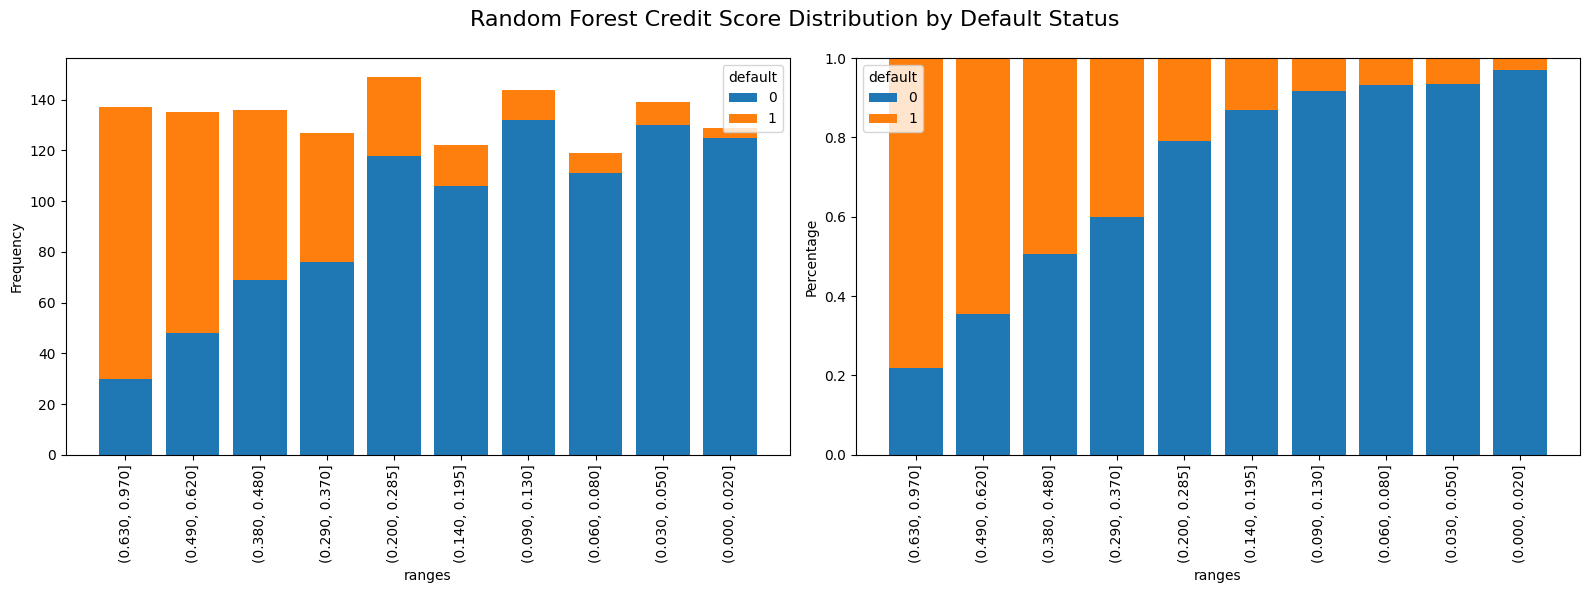

Default rates by score decile (lower decile = higher risk):
Decile 0: 78.10%
Decile 1: 64.44%
Decile 2: 49.26%
Decile 3: 40.16%
Decile 4: 20.81%
Decile 5: 13.11%
Decile 6: 8.33%
Decile 7: 6.72%
Decile 8: 6.47%
Decile 9: 3.10%


In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# Get the predicted probabilities for the positive class (default)
y_pred_proba = reg_forest.predict_proba(X_test_scaled)[:, 1]

# Create a DataFrame with the actual outcomes and predicted probabilities
results_df = pd.DataFrame({
    'actual_default': y_test,
    'default_probability': y_pred_proba
})

# Create deciles (10 equal-sized bins) based on default probability
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
results_df['score_decile'] = discretizer.fit_transform(results_df[['default_probability']])

# Map to reverse the order so higher decile = lower risk (traditional credit scoring)
max_decile = results_df['score_decile'].max()
results_df['score_decile'] = max_decile - results_df['score_decile']

# Get the decile boundaries for labeling
boundaries = []
for i in range(10):
    min_val = results_df[results_df['score_decile'] == i]['default_probability'].min()
    max_val = results_df[results_df['score_decile'] == i]['default_probability'].max()
    boundaries.append(f"({min_val:.3f}, {max_val:.3f}]")

# Count defaults and non-defaults in each decile
grouped = results_df.groupby(['score_decile', 'actual_default']).size().unstack(fill_value=0)

# Rename columns for clarity
if 0 in grouped.columns and 1 in grouped.columns:
    grouped.columns = ['non_default', 'default']
else:
    if 0 not in grouped.columns:
        grouped['non_default'] = 0
    if 1 not in grouped.columns:
        grouped['default'] = 0
    grouped = grouped[['non_default', 'default']]

# Calculate totals for each decile
grouped['total'] = grouped['non_default'] + grouped['default']

# Calculate default rate for each decile
grouped['default_rate'] = grouped['default'] / grouped['total']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the count chart
bottom_vals = np.zeros(len(grouped))
for col, color, label in zip(['non_default', 'default'], ['#1f77b4', '#ff7f0e'], ['0', '1']):
    ax1.bar(boundaries, grouped[col], bottom=bottom_vals, label=label, color=color)
    bottom_vals += grouped[col].values

# Plot the percentage chart
ax2.bar(boundaries, grouped['non_default'] / grouped['total'], label='0', color='#1f77b4')
ax2.bar(boundaries, grouped['default'] / grouped['total'], bottom=grouped['non_default'] / grouped['total'],
        label='1', color='#ff7f0e')

# Customize the count chart
ax1.set_xlabel('ranges')
ax1.set_ylabel('Frequency')
ax1.legend(title='default')
ax1.tick_params(axis='x', rotation=90)

# Customize the percentage chart
ax2.set_xlabel('ranges')
ax2.set_ylabel('Percentage')
ax2.set_ylim(0, 1)
ax2.legend(title='default')
ax2.tick_params(axis='x', rotation=90)

# Add a title to the figure
plt.suptitle('Random Forest Credit Score Distribution by Default Status', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()

# Print default rates by decile for analysis
print("Default rates by score decile (lower decile = higher risk):")
for i in range(10):
    if i in grouped.index:
        print(f"Decile {i}: {grouped.loc[i, 'default_rate']:.2%}")

# Code to create ROC-optimized predictions with threshold of 0.28
y_pred_proba_forest = reg_forest.predict_proba(X_test_scaled)[:, 1]
optimal_threshold = 0.28
clas_forest_auc = (y_pred_proba_forest >= optimal_threshold).astype(int)

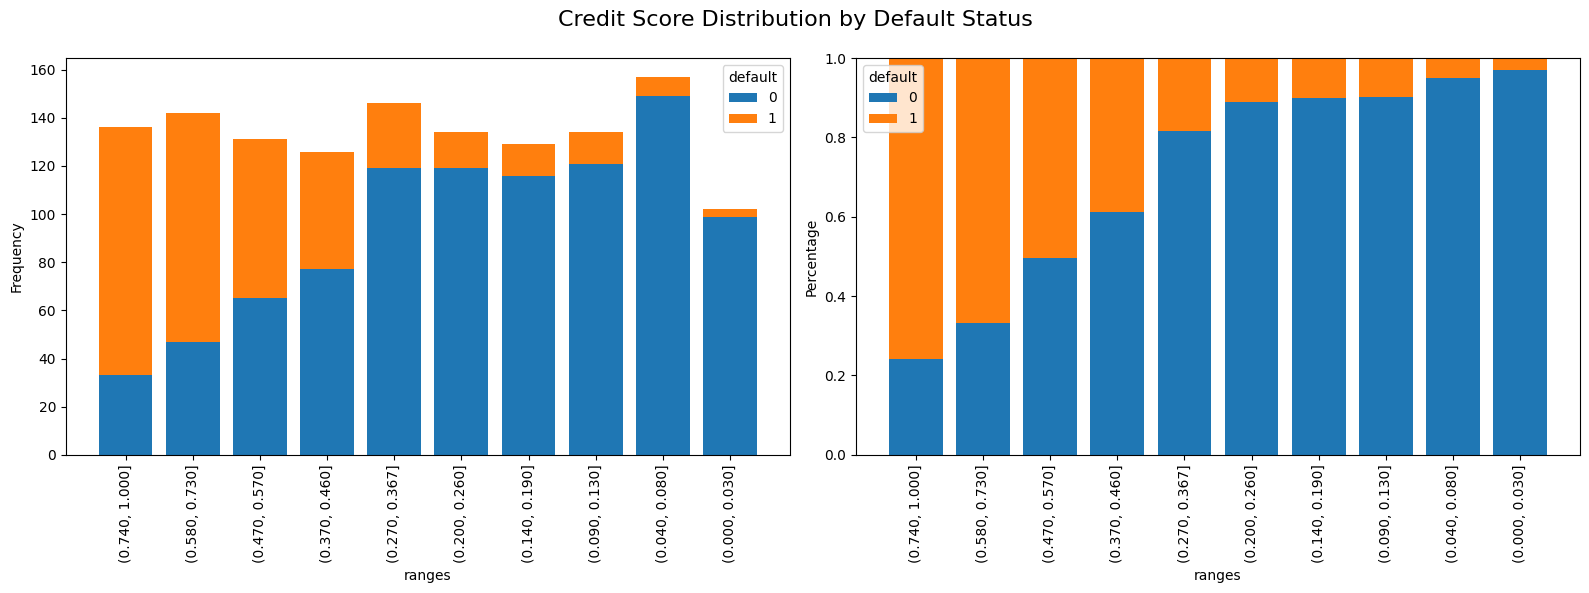

Default rates by score decile (lower decile = higher risk):
Decile 0: 75.74%
Decile 1: 66.90%
Decile 2: 50.38%
Decile 3: 38.89%
Decile 4: 18.49%
Decile 5: 11.19%
Decile 6: 10.08%
Decile 7: 9.70%
Decile 8: 5.10%
Decile 9: 2.94%


In [105]:

from sklearn.preprocessing import KBinsDiscretizer

# Assuming you already have your model and predictions
# X_test_scaled - your scaled test features
# y_test - your actual target values
# model - your trained model (using SMOTE approach)

# Get the predicted probabilities for the positive class (default)
# If you haven't done this yet:
y_pred_proba = reg_forest2.predict_proba(X_test_scaled)[:, 1]

# Create a DataFrame with the actual outcomes and predicted probabilities
results_df = pd.DataFrame({
    'actual_default': y_test,
    'default_probability': y_pred_proba
})

# Create deciles (10 equal-sized bins) based on default probability
# Higher probability = higher risk
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
results_df['score_decile'] = discretizer.fit_transform(results_df[['default_probability']])

# Map to reverse the order so higher decile = lower risk (traditional credit scoring)
# This step is optional if you prefer higher numbers to represent higher risk
max_decile = results_df['score_decile'].max()
results_df['score_decile'] = max_decile - results_df['score_decile']

# Get the decile boundaries for labeling
boundaries = []
for i in range(10):
    min_val = results_df[results_df['score_decile'] == i]['default_probability'].min()
    max_val = results_df[results_df['score_decile'] == i]['default_probability'].max()
    boundaries.append(f"({min_val:.3f}, {max_val:.3f}]")

# Count defaults and non-defaults in each decile
grouped = results_df.groupby(['score_decile', 'actual_default']).size().unstack(fill_value=0)

# Rename columns for clarity
if 0 in grouped.columns and 1 in grouped.columns:
    grouped.columns = ['non_default', 'default']
else:
    if 0 not in grouped.columns:
        grouped['non_default'] = 0
    if 1 not in grouped.columns:
        grouped['default'] = 0
    grouped = grouped[['non_default', 'default']]

# Calculate totals for each decile
grouped['total'] = grouped['non_default'] + grouped['default']

# Calculate default rate for each decile
grouped['default_rate'] = grouped['default'] / grouped['total']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the count chart
bottom_vals = np.zeros(len(grouped))
for col, color, label in zip(['non_default', 'default'], ['#1f77b4', '#ff7f0e'], ['0', '1']):
    ax1.bar(boundaries, grouped[col], bottom=bottom_vals, label=label, color=color)
    bottom_vals += grouped[col].values

# Plot the percentage chart
ax2.bar(boundaries, grouped['non_default'] / grouped['total'], label='0', color='#1f77b4')
ax2.bar(boundaries, grouped['default'] / grouped['total'], bottom=grouped['non_default'] / grouped['total'],
        label='1', color='#ff7f0e')

# Customize the count chart
ax1.set_xlabel('ranges')
ax1.set_ylabel('Frequency')
ax1.legend(title='default')
ax1.tick_params(axis='x', rotation=90)

# Customize the percentage chart
ax2.set_xlabel('ranges')
ax2.set_ylabel('Percentage')
ax2.set_ylim(0, 1)
ax2.legend(title='default')
ax2.tick_params(axis='x', rotation=90)

# Add a title to the figure
plt.suptitle('Credit Score Distribution by Default Status', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()

# Print default rates by decile for analysis
print("Default rates by score decile (lower decile = higher risk):")
for i in range(10):
    if i in grouped.index:
        print(f"Decile {i}: {grouped.loc[i, 'default_rate']:.2%}")

#**4. Model Evaluation and Selection**

## Model Comparison for Credit Scoring Implementation

### Performance Metrics Comparison

| Model | Best Version | Accuracy | F1 (Default Class) | Recall (Default) | Precision (Default) | AUC-ROC |
|-------|-------------|----------|------------------|-----------------|-------------------|---------|
| Logistic Regression | Balanced | 0.78 | 0.67 | 0.73 | 0.61 | 0.845 |
| Decision Tree | Balanced | 0.76 | 0.63 | 0.69 | 0.57 | 0.783 |
| Random Forest | ROC-optimized | 0.77 | 0.68 | 0.81 | 0.58 | 0.842 |

### Recommendation:

Based on these metrics, the **ROC-optimized Random Forest** appears to be marginally the best model for the credit scoring application for the following reasons:

1. **Superior performance on the default class**: The slightly higher F1-score and recall for defaults means it's better at identifying risky customers, which is crucial for credit scoring.

2. **Good balance of metrics**: It maintains high accuracy while optimizing the identification of defaults.

3. **Model complexity vs. performance**: Random Forests generally handle non-linear relationships and interactions between variables better than logistic regression, which is often valuable in credit scoring where risk factors may interact in complex ways.

### Implementation Steps:


1. Consider the operational aspects: Random Forest models are more complex and may be harder to explain to stakeholders or customers than logistic regression.

2. Implement a scoring system based on the chosen model, with appropriate cutoff points for different risk tiers.


#**5. Implementation of the model**

## Creating a proof profile

In [106]:
perfil = pd.DataFrame(X_train_scaled).iloc[0:1]
perfil = X_train.columns
perfil

Index(['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt',
       'amount', 'price', 'home_other', 'home_owner', 'home_parents',
       'home_rent', 'marital_married', 'marital_other', 'marital_single',
       'records_no', 'records_yes', 'job_fixed', 'job_freelance', 'job_others',
       'job_partime'],
      dtype='object')

In [107]:
def crear_fila_dataframe():
    # Diccionario base con todos los campos inicializados a cero
    datos = {'seniority':0.0, 'time':0.0, 'age':0.0, 'expenses':0.0, 'income':0.0, 'assets':0.0, 'debt':0.0,
       'amount':0.0, 'price':0.0, 'home_other':0.0, 'home_owner':0.0, 'home_parents':0.0,
       'home_rent':0.0, 'marital_married':0.0, 'marital_other':0.0, 'marital_single':0.0,
       'records_no':0.0, 'records_yes':0.0, 'job_fixed':0.0, 'job_freelance':0.0, 'job_others':0.0,
       'job_partime':0.0
        }
          # Rellenar los datos mediante input del usuario
    for campo in datos:
        valor = input(f"{campo} (actual: {datos[campo]}): ")
        if valor.strip():  # Si no está vacío, actualizar el valor
            datos[campo] = float(valor)

    # Crear DataFrame con una única fila
    df = pd.DataFrame([datos])
    return df

In [108]:


# Uso de la función
df_usuario = crear_fila_dataframe()

seniority (actual: 0.0): 10
time (actual: 0.0): 36
age (actual: 0.0): 32
expenses (actual: 0.0): 2500
income (actual: 0.0): 80000
assets (actual: 0.0): 10000
debt (actual: 0.0): 0
amount (actual: 0.0): 23000
price (actual: 0.0): 30000
home_other (actual: 0.0): 0
home_owner (actual: 0.0): 1
home_parents (actual: 0.0): 0
home_rent (actual: 0.0): 0
marital_married (actual: 0.0): 1
marital_other (actual: 0.0): 0
marital_single (actual: 0.0): 0
records_no (actual: 0.0): 0
records_yes (actual: 0.0): 1
job_fixed (actual: 0.0): 1
job_freelance (actual: 0.0): 0
job_others (actual: 0.0): 0
job_partime (actual: 0.0): 0


## Generating a prediction

In [109]:
# Scale the user data
df_usuario_scaled = scaler.transform(df_usuario)

# Predict probability of default
prob_default = reg_forest.predict_proba(df_usuario_scaled)[:, 1]

# Apply the optimized threshold
optimal_threshold = 0.28
prediction = int(prob_default[0] >= optimal_threshold)

# Display the result
print(f"Score del cliente {(1-prob_default[0])*1000:.0f}")

Score del cliente 580


## Estimating the late payment ratio

In [110]:
# Assuming you have the predicted probabilities and optimal threshold
y_pred_proba_forest = reg_forest.predict_proba(X_test_scaled)[:, 1]
optimal_threshold = 0.28
predictions = (y_pred_proba_forest >= optimal_threshold).astype(int)

# Calculate metrics
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

# Various possible "late payment ratio" interpretations
false_negative_rate = fn / (tp + fn)  # Proportion of actual defaults missed
false_positive_rate = fp / (tn + fp)  # Proportion of non-defaults incorrectly flagged
precision = tp / (tp + fp)  # Proportion of predicted defaults that are correct
print(f"False Negative Rate: {false_negative_rate:.2%}")
print(f"False Positive Rate: {false_positive_rate:.2%}")
print(f"Precision: {precision:.2%}")

False Negative Rate: 18.88%
False Positive Rate: 24.55%
Precision: 57.82%
